# Loading the Reuters dataset

In [29]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

# Decoding newswires back to text

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [6]:
train_labels[10]

3

# Encoding the data

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data) #Vectorized training data
x_test = vectorize_sequences(test_data) #Vectorized test data

In [10]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels) #Vectorized training labels
one_hot_test_labels = to_one_hot(test_labels) #Vectorized test labels

# Model definition

In [12]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# Compiling the model

In [13]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

# Setting aside a validation set

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# Training the model

In [15]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 461us/sample - loss: 2.7008 - acc: 0.4782 - val_loss: 1.7789 - val_acc: 0.6510
Epoch 2/20
7982/7982 [==============================] - 2s 247us/sample - loss: 1.4256 - acc: 0.7127 - val_loss: 1.3048 - val_acc: 0.7290
Epoch 3/20
7982/7982 [==============================] - 2s 247us/sample - loss: 1.0500 - acc: 0.7774 - val_loss: 1.1291 - val_acc: 0.7700
Epoch 4/20
7982/7982 [==============================] - 2s 239us/sample - loss: 0.8218 - acc: 0.8287 - val_loss: 1.0453 - val_acc: 0.7720
Epoch 5/20
7982/7982 [==============================] - 2s 229us/sample - loss: 0.6531 - acc: 0.8652 - val_loss: 0.9658 - val_acc: 0.8030
Epoch 6/20
7982/7982 [==============================] - 2s 234us/sample - loss: 0.5221 - acc: 0.8940 - val_loss: 0.9238 - val_acc: 0.8150
Epoch 7/20
7982/7982 [==============================] - 2s 231us/sample - loss: 0.4212 - acc: 0.9139 - val_loss: 0.9038 - va

# Plotting the training and validation loss

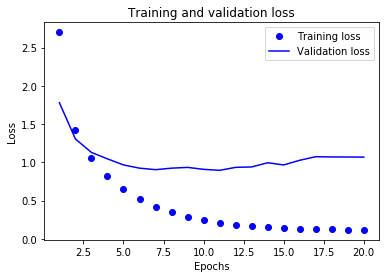

In [17]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Plotting the training and validation accuracy

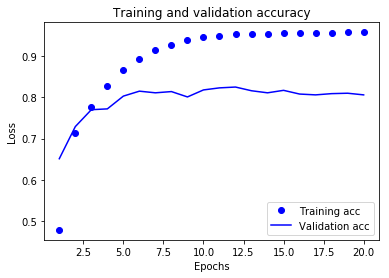

In [18]:
plt.clf() #clears the figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Retraining a model from scratch

In [19]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [20]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [21]:
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 305us/sample - loss: 2.5354 - acc: 0.5485 - val_loss: 1.6769 - val_acc: 0.6520
Epoch 2/9
7982/7982 [==============================] - 2s 222us/sample - loss: 1.3577 - acc: 0.7142 - val_loss: 1.2643 - val_acc: 0.7160
Epoch 3/9
7982/7982 [==============================] - 2s 221us/sample - loss: 1.0109 - acc: 0.7820 - val_loss: 1.0991 - val_acc: 0.7640
Epoch 4/9
7982/7982 [==============================] - 2s 224us/sample - loss: 0.7940 - acc: 0.8330 - val_loss: 1.0198 - val_acc: 0.7840
Epoch 5/9
7982/7982 [==============================] - 2s 225us/sample - loss: 0.6267 - acc: 0.8685 - val_loss: 0.9540 - val_acc: 0.7980
Epoch 6/9
7982/7982 [==============================] - 2s 222us/sample - loss: 0.5028 - acc: 0.8985 - val_loss: 0.9076 - val_acc: 0.8080
Epoch 7/9
7982/7982 [==============================] - 2s 224us/sample - loss: 0.3993 - acc: 0.9177 - val_loss: 0.9088 - val_acc: 

In [22]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 1s 354us/sample - loss: 0.9743 - acc: 0.7867


In [23]:
results

[0.9743399320706022, 0.78673196]

# Generating predictions for new data

In [24]:
predictions = model.predict(x_test)

In [25]:
predictions[0].shape

(46,)

In [26]:
np.sum(predictions[0])

0.99999994

In [27]:
np.argmax(predictions[0])

3